In [1]:
import pandas as pd

In [2]:
# Building a dataframe from the adjusted inscripta design inputs and not the final 
# output design library since I don't want the redundancies applied to sets that didn't
# have high score designs to be reflected in this figure since these redundancies
# don't represent the actual amount initial observed in ALEdb and the WT alleleome.
# This dataset also represent the set of variants that are feasible for the Inscripta
# machine to make relative to the initial input set.

aledb_df = pd.concat([
    pd.read_csv('./data/for_inscripta_designer/final/aledb_high_design_score.csv'),
    pd.read_csv('./data/for_inscripta_designer/final/aledb_low_design_score.csv'),
    pd.read_csv('./data/for_inscripta_designer/final/aledb_mid_design_score.csv'),
])
aledb_df['source'] = 'ALEdb'
print(len(aledb_df))

pan_df = pd.concat([
    pd.read_csv('./data/for_inscripta_designer/final/pan_high_design_score.csv'),
    pd.read_csv('./data/for_inscripta_designer/final/pan_mid_design_score.csv'),
    pd.read_csv('./data/for_inscripta_designer/final/pan_low_design_score.csv'),
    pd.read_csv('./data/for_inscripta_designer/final/pan_large_var.csv')
])
pan_df['source'] = 'WT alleleome'
print(len(pan_df))

var_df = pd.concat([aledb_df, pan_df])
var_df.drop(columns=['Unnamed: 0'],inplace=True)
var_df.fillna('',inplace=True)
# var_df.drop_duplicates(inplace=True)  # No need since these should be unique by design
display(len(var_df), var_df)

511
4368


4879

,INSCRIPTA_EditType,INSCRIPTA_TargetType,INSCRIPTA_TargetName,INSCRIPTA_CoordinateType,INSCRIPTA_PositionType,INSCRIPTA_PositionValue,INSCRIPTA_SaturationReplacementType,INSCRIPTA_Control,INSCRIPTA_NumberOfCoordinatesToDelete,INSCRIPTA_InsertionSequence,INSCRIPTA_Comment,source
0,Substitution,Specific CDS,nadR,Nucleotide,Specific Position,606,,,,A,,ALEdb
1,Substitution,Specific CDS,nagC,Nucleotide,Specific Position,615,,,,G,,ALEdb
2,Substitution,Specific CDS,purT,Nucleotide,Specific Position,848,,,,A,,ALEdb
3,Substitution,Specific CDS,nadR,Nucleotide,Specific Position,175,,,,C,,ALEdb
4,Substitution,Specific CDS,pykF,Nucleotide,Specific Position,1379,,,,A,,ALEdb
...,...,...,...,...,...,...,...,...,...,...,...,...
77,Substitution,Specific CDS,rob,Amino Acid,Specific Position,208,,,,N,,WT alleleome
0,Substitution,Specific CDS,rob,Amino Acid,Specific Position,267,,,,EDESRDQET,,WT alleleome
1,Substitution,Specific CDS,ybjL,Amino Acid,Specific Position,166,,,,NLFNRSGEFDCWCAL,,WT alleleome
2,Substitution,Specific CDS,rob,Amino Acid,Specific Position,267,,,,EDESRDQAT,,WT alleleome


# Annotate variants for analytics afterwards

In [3]:
ict_var_to_nscrpt_design = pd.read_pickle('./data/aledb_key_var_to_nscrpt_design.pkl')


def _is_var_from_ict_ale(var):
    df = ict_var_to_nscrpt_design[
        (ict_var_to_nscrpt_design.INSCRIPTA_EditType==var['INSCRIPTA_EditType'])
        & (ict_var_to_nscrpt_design.INSCRIPTA_TargetType==var['INSCRIPTA_TargetType'])
        & (ict_var_to_nscrpt_design.INSCRIPTA_TargetName==var['INSCRIPTA_TargetName'])
        & (ict_var_to_nscrpt_design.INSCRIPTA_CoordinateType==var['INSCRIPTA_CoordinateType'])
        & (ict_var_to_nscrpt_design.INSCRIPTA_PositionType==var['INSCRIPTA_PositionType'])
        & (ict_var_to_nscrpt_design.INSCRIPTA_PositionValue==var['INSCRIPTA_PositionValue'])
        & (ict_var_to_nscrpt_design.INSCRIPTA_NumberOfCoordinatesToDelete==var['INSCRIPTA_NumberOfCoordinatesToDelete'])
        & (ict_var_to_nscrpt_design.INSCRIPTA_InsertionSequence==var['INSCRIPTA_InsertionSequence'])
    ]

    return len(df)>0


var_df['source'] = var_df.apply(lambda v: "ICT ALE" if _is_var_from_ict_ale(v) else v['source'], axis=1)
var_df.source.unique()

array(['ALEdb', 'ICT ALE', 'WT alleleome'], dtype=object)

In [4]:
nscrptdsgnr_input_w_var_effects = pd.concat([
    pd.read_csv('./data/aledb_nscrptdsgnr_in.csv'),
    pd.read_csv('./data/pangenome_nscrptdsgnr_in.csv')
    ])
nscrptdsgnr_input_w_var_effects.fillna('', inplace=True)


def _get_var_seq_change_effect(var):
    df = nscrptdsgnr_input_w_var_effects[
        (nscrptdsgnr_input_w_var_effects.INSCRIPTA_EditType==var['INSCRIPTA_EditType'])
        & (nscrptdsgnr_input_w_var_effects.INSCRIPTA_TargetType==var['INSCRIPTA_TargetType'])
        & (nscrptdsgnr_input_w_var_effects.INSCRIPTA_TargetName==var['INSCRIPTA_TargetName'])
        & (nscrptdsgnr_input_w_var_effects.INSCRIPTA_CoordinateType==var['INSCRIPTA_CoordinateType'])
        & (nscrptdsgnr_input_w_var_effects.INSCRIPTA_PositionType==var['INSCRIPTA_PositionType'])
        & (nscrptdsgnr_input_w_var_effects.INSCRIPTA_PositionValue==var['INSCRIPTA_PositionValue'])
        & (nscrptdsgnr_input_w_var_effects.INSCRIPTA_NumberOfCoordinatesToDelete==var['INSCRIPTA_NumberOfCoordinatesToDelete'])
        & (nscrptdsgnr_input_w_var_effects.INSCRIPTA_InsertionSequence==var['INSCRIPTA_InsertionSequence'])
    ]

    try:
        assert(len(df)==1)  # There should only ever be one match since each design is unique.
    except AssertionError as m:
        display(len(df), df)

    var['AA ref seq'] = df.iloc[0]['AA ref seq']
    var['AA seq change'] = df.iloc[0]['AA seq change']
    var['variant effect'] = df.iloc[0]['effect']
    var['Grantham score'] = df.iloc[0]['Grantham score']
    var['Grantham category'] = df.iloc[0]['Grantham category']
    # var['source'] = df.iloc[0]['source']  # Can't rely on this because doesn't include ICT ALE; could refactor in the future
    return var


var_df = var_df.apply(_get_var_seq_change_effect, axis=1)
assert('' not in var_df['variant effect'].unique())
var_df

,INSCRIPTA_EditType,INSCRIPTA_TargetType,INSCRIPTA_TargetName,INSCRIPTA_CoordinateType,INSCRIPTA_PositionType,INSCRIPTA_PositionValue,INSCRIPTA_SaturationReplacementType,INSCRIPTA_Control,INSCRIPTA_NumberOfCoordinatesToDelete,INSCRIPTA_InsertionSequence,INSCRIPTA_Comment,source,AA ref seq,AA seq change,variant effect,Grantham score,Grantham category
0,Substitution,Specific CDS,nadR,Nucleotide,Specific Position,606,,,,A,,ALEdb,T,T,synonymous,0.0,conservative
1,Substitution,Specific CDS,nagC,Nucleotide,Specific Position,615,,,,G,,ICT ALE,Y,*,truncation,,
2,Substitution,Specific CDS,purT,Nucleotide,Specific Position,848,,,,A,,ALEdb,R,H,nonsynonymous,29.0,conservative
3,Substitution,Specific CDS,nadR,Nucleotide,Specific Position,175,,,,C,,ALEdb,F,L,nonsynonymous,22.0,conservative
4,Substitution,Specific CDS,pykF,Nucleotide,Specific Position,1379,,,,A,,ALEdb,G,D,nonsynonymous,94.0,moderately conservative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Substitution,Specific CDS,rob,Amino Acid,Specific Position,208,,,,N,,WT alleleome,D,N,nonsynonymous,23.0,conservative
0,Substitution,Specific CDS,rob,Amino Acid,Specific Position,267,,,,EDESRDQET,,WT alleleome,AEDAKAGDR,EDESRDQET,nonsynonymous,126.0,moderately radical
1,Substitution,Specific CDS,ybjL,Amino Acid,Specific Position,166,,,,NLFNRSGEFDCWCAL,,WT alleleome,TYLIGLVSLIVGARY,NLFNRSGEFDCWCAL,nonsynonymous,195.0,radical
2,Substitution,Specific CDS,rob,Amino Acid,Specific Position,267,,,,EDESRDQAT,,WT alleleome,AEDAKAGDR,EDESRDQAT,nonsynonymous,126.0,moderately radical


In [5]:
import util.util as util
import util.const as const

var_eff_pal = const.GRANTHAM_CATEGORY_COLOR_PALETTE.copy()
var_eff_pal.update(const.PREDICTED_VARIANT_EFFECT_COLOR_PALETTE)

var_df['predicted variant effect'] = var_df.apply(util.get_predicted_variant_effect, axis=1)
var_src_pred_eff_cnt_df = var_df.groupby(['source','predicted variant effect']).size().reset_index(name='count')

for g, gdf in var_src_pred_eff_cnt_df.groupby(['predicted variant effect']):
    srs = pd.Series({"source": 'total', "predicted variant effect": g, "count": gdf['count'].sum()})
    var_src_pred_eff_cnt_df = pd.concat([var_src_pred_eff_cnt_df, pd.DataFrame(srs).T], ignore_index=True)

var_src_pred_eff_cnt_df

,source,predicted variant effect,count
0,ALEdb,conservative,117
1,ALEdb,moderately conservative,124
2,ALEdb,moderately radical,48
3,ALEdb,other,15
4,ALEdb,radical,30
5,ALEdb,truncation,66
6,ICT ALE,conservative,9
7,ICT ALE,moderately conservative,25
8,ICT ALE,moderately radical,21
9,ICT ALE,other,12


# Create results from input

In [6]:
var_source_cnt_df = pd.DataFrame(0, columns=['ICT ALE', 'ALEdb', 'WT alleleome'], index=var_df.INSCRIPTA_TargetName.unique())

for group_dets, gdf in var_df.groupby(['INSCRIPTA_TargetName', 'source']):
    var_source_cnt_df.loc[group_dets[0], group_dets[1]] = len(gdf)

var_source_cnt_df

,ICT ALE,ALEdb,WT alleleome
nadR,5,27,195
nagC,3,33,227
purT,4,19,377
pykF,8,47,158
rho,3,36,61
sapA,2,10,450
mreB,5,15,86
spoT,15,22,222
rpoA,6,28,91
metJ,9,9,38


## Getting the number of strains for each data source

In [7]:
wt_strain_cnt = pd.read_pickle('./data/panvars/Ecoli_strain_by_allele.pickle.gz').shape[1]
wt_strain_cnt

12661

In [8]:
ict_exps = {
    'TOL_1,2-propanediol',
    'TOL_2,3-butanediol',
    'TOL_adipic_acid',
    'TOL_coumaric_acid',
    'TOL_glutaric_acid',
    'TOL_hexamethylenediamine',
    'TOL_hexanoic_acid',
    'TOL_isobutyric_acid',
    'TOL_n-butanol',
    'TOL_octanoic_acid',
    'TOL_parent',
    'TOL_propanediol',
    'TOL_putrescine'
}

all_aledb_MG1655_mut_df = pd.read_pickle('./data/all_aledb_MG1655_mut_df.pkl')

all_aledb_MG1655_mut_df['sample'] = all_aledb_MG1655_mut_df.apply(lambda r: r['exp']+' '+str(r['ale'])+' '+str(r['flask'])+' '+str(r['isolate'])+' '+str(r['tech_rep']), axis=1)

ict_exp_mut_df = all_aledb_MG1655_mut_df[all_aledb_MG1655_mut_df.exp.isin(ict_exps)]
ict_exp_smpls = set(ict_exp_mut_df['sample'].unique())
ict_exp_smpl_cnt = len(ict_exp_smpls)

other_aledb_exp_mut_df = all_aledb_MG1655_mut_df[~(all_aledb_MG1655_mut_df.exp.isin(ict_exps))]
other_aledb_exp_smpls = set(other_aledb_exp_mut_df['sample'].unique())
other_aledb_exp_smpl_cnt = len(other_aledb_exp_smpls)

print(ict_exp_smpl_cnt, other_aledb_exp_smpl_cnt)

245 2440


## Getting the amount of overlapping variants between ALE and WT

In [9]:
all_nonsyn_df = var_df[(
    var_df.INSCRIPTA_EditType=='Substitution')
    & (var_df['variant effect']=='nonsynonymous')
    ].copy()
all_nonsyn_df

,INSCRIPTA_EditType,INSCRIPTA_TargetType,INSCRIPTA_TargetName,INSCRIPTA_CoordinateType,INSCRIPTA_PositionType,INSCRIPTA_PositionValue,INSCRIPTA_SaturationReplacementType,INSCRIPTA_Control,INSCRIPTA_NumberOfCoordinatesToDelete,INSCRIPTA_InsertionSequence,INSCRIPTA_Comment,source,AA ref seq,AA seq change,variant effect,Grantham score,Grantham category,predicted variant effect
2,Substitution,Specific CDS,purT,Nucleotide,Specific Position,848,,,,A,,ALEdb,R,H,nonsynonymous,29.0,conservative,conservative
3,Substitution,Specific CDS,nadR,Nucleotide,Specific Position,175,,,,C,,ALEdb,F,L,nonsynonymous,22.0,conservative,conservative
4,Substitution,Specific CDS,pykF,Nucleotide,Specific Position,1379,,,,A,,ALEdb,G,D,nonsynonymous,94.0,moderately conservative,moderately conservative
5,Substitution,Specific CDS,pykF,Nucleotide,Specific Position,673,,,,A,,ALEdb,E,K,nonsynonymous,56.0,moderately conservative,moderately conservative
7,Substitution,Specific CDS,rho,Nucleotide,Specific Position,251,,,,T,,ALEdb,S,I,nonsynonymous,142.0,moderately radical,moderately radical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Substitution,Specific CDS,rob,Amino Acid,Specific Position,208,,,,N,,WT alleleome,D,N,nonsynonymous,23.0,conservative,conservative
0,Substitution,Specific CDS,rob,Amino Acid,Specific Position,267,,,,EDESRDQET,,WT alleleome,AEDAKAGDR,EDESRDQET,nonsynonymous,126.0,moderately radical,moderately radical
1,Substitution,Specific CDS,ybjL,Amino Acid,Specific Position,166,,,,NLFNRSGEFDCWCAL,,WT alleleome,TYLIGLVSLIVGARY,NLFNRSGEFDCWCAL,nonsynonymous,195.0,radical,radical
2,Substitution,Specific CDS,rob,Amino Acid,Specific Position,267,,,,EDESRDQAT,,WT alleleome,AEDAKAGDR,EDESRDQAT,nonsynonymous,126.0,moderately radical,moderately radical


In [10]:
from aledbmutil.mut import get_AA_from_nuc  # Should probably used aledbmutil instead; should have the same function.
from util.util import get_AA_stop_pos

all_nonsyn_df['AA start pos'] = all_nonsyn_df.apply(lambda v: get_AA_from_nuc(
    v.INSCRIPTA_PositionValue) if v.INSCRIPTA_CoordinateType == 'Nucleotide' else v.INSCRIPTA_PositionValue, axis=1)
all_nonsyn_df['AA stop pos'] = all_nonsyn_df.apply(
    lambda v: int(get_AA_stop_pos(v)), axis=1)
all_nonsyn_df['AA positions'] = all_nonsyn_df.apply(lambda v: set(
    range(v['AA start pos'], v['AA stop pos']+1)), axis=1)
all_nonsyn_df

,INSCRIPTA_EditType,INSCRIPTA_TargetType,INSCRIPTA_TargetName,INSCRIPTA_CoordinateType,INSCRIPTA_PositionType,INSCRIPTA_PositionValue,INSCRIPTA_SaturationReplacementType,INSCRIPTA_Control,INSCRIPTA_NumberOfCoordinatesToDelete,INSCRIPTA_InsertionSequence,...,source,AA ref seq,AA seq change,variant effect,Grantham score,Grantham category,predicted variant effect,AA start pos,AA stop pos,AA positions
2,Substitution,Specific CDS,purT,Nucleotide,Specific Position,848,,,,A,...,ALEdb,R,H,nonsynonymous,29.0,conservative,conservative,283,283,{283}
3,Substitution,Specific CDS,nadR,Nucleotide,Specific Position,175,,,,C,...,ALEdb,F,L,nonsynonymous,22.0,conservative,conservative,59,59,{59}
4,Substitution,Specific CDS,pykF,Nucleotide,Specific Position,1379,,,,A,...,ALEdb,G,D,nonsynonymous,94.0,moderately conservative,moderately conservative,460,460,{460}
5,Substitution,Specific CDS,pykF,Nucleotide,Specific Position,673,,,,A,...,ALEdb,E,K,nonsynonymous,56.0,moderately conservative,moderately conservative,225,225,{225}
7,Substitution,Specific CDS,rho,Nucleotide,Specific Position,251,,,,T,...,ALEdb,S,I,nonsynonymous,142.0,moderately radical,moderately radical,84,84,{84}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Substitution,Specific CDS,rob,Amino Acid,Specific Position,208,,,,N,...,WT alleleome,D,N,nonsynonymous,23.0,conservative,conservative,208,208,{208}
0,Substitution,Specific CDS,rob,Amino Acid,Specific Position,267,,,,EDESRDQET,...,WT alleleome,AEDAKAGDR,EDESRDQET,nonsynonymous,126.0,moderately radical,moderately radical,267,275,"{267, 268, 269, 270, 271, 272, 273, 274, 275}"
1,Substitution,Specific CDS,ybjL,Amino Acid,Specific Position,166,,,,NLFNRSGEFDCWCAL,...,WT alleleome,TYLIGLVSLIVGARY,NLFNRSGEFDCWCAL,nonsynonymous,195.0,radical,radical,166,180,"{166, 167, 168, 169, 170, 171, 172, 173, 174, ..."
2,Substitution,Specific CDS,rob,Amino Acid,Specific Position,267,,,,EDESRDQAT,...,WT alleleome,AEDAKAGDR,EDESRDQAT,nonsynonymous,126.0,moderately radical,moderately radical,267,275,"{267, 268, 269, 270, 271, 272, 273, 274, 275}"


In [11]:
d = {g:{'both':set(), 'ALE':set(), 'WT alleleome':set()} for g in all_nonsyn_df.INSCRIPTA_TargetName.unique()}

# Look at only nonsynonymous substitutions
for gene, gdf in all_nonsyn_df.groupby('INSCRIPTA_TargetName'):

    # Get all ALE nonsyn subs, which includes ICT ALE nonsyn subs
    ale_df = gdf[(gdf.source=='ALEdb') | (gdf.source=='ICT ALE')]
    ale_var_AA_positions = set()
    for _, var in ale_df.iterrows():
        ale_var_AA_positions.update(var['AA positions'])

    # Get all WT alleleome nonsyn subs
    wt_df = gdf[gdf.source=='WT alleleome']
    wt_var_AA_positions = set()
    for _, var in wt_df.iterrows():
        wt_var_AA_positions.update(var['AA positions'])

    d[gene]['both'].update(ale_var_AA_positions.intersection(wt_var_AA_positions))
    d[gene]['ALE'].update(ale_var_AA_positions.difference(wt_var_AA_positions))
    d[gene]['WT alleleome'].update(wt_var_AA_positions.difference(ale_var_AA_positions))

# debug
# display(d)

all_nonsyn_df['AA_overlap_between_sources'] = all_nonsyn_df.apply(
    lambda v:
        True if len(v['AA positions'] & d[v.INSCRIPTA_TargetName]['both']) > 0 else False,
    axis=1)

overlap_nonsyn_df = all_nonsyn_df[all_nonsyn_df.AA_overlap_between_sources]
overlap_nonsyn_df.to_pickle('./data/overlap_nonsyn_df.pkl')
overlap_nonsyn_df

,INSCRIPTA_EditType,INSCRIPTA_TargetType,INSCRIPTA_TargetName,INSCRIPTA_CoordinateType,INSCRIPTA_PositionType,INSCRIPTA_PositionValue,INSCRIPTA_SaturationReplacementType,INSCRIPTA_Control,INSCRIPTA_NumberOfCoordinatesToDelete,INSCRIPTA_InsertionSequence,...,AA ref seq,AA seq change,variant effect,Grantham score,Grantham category,predicted variant effect,AA start pos,AA stop pos,AA positions,AA_overlap_between_sources
2,Substitution,Specific CDS,purT,Nucleotide,Specific Position,848,,,,A,...,R,H,nonsynonymous,29.0,conservative,conservative,283,283,{283},True
7,Substitution,Specific CDS,rho,Nucleotide,Specific Position,251,,,,T,...,S,I,nonsynonymous,142.0,moderately radical,moderately radical,84,84,{84},True
8,Substitution,Specific CDS,sapA,Nucleotide,Specific Position,41,,,,G,...,L,R,nonsynonymous,102.0,moderately radical,moderately radical,14,14,{14},True
11,Substitution,Specific CDS,pykF,Nucleotide,Specific Position,1268,,,,A,...,I,N,nonsynonymous,149.0,moderately radical,moderately radical,423,423,{423},True
16,Substitution,Specific CDS,metJ,Nucleotide,Specific Position,199,,,,G,...,T,A,nonsynonymous,58.0,moderately conservative,moderately conservative,67,67,{67},True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Substitution,Specific CDS,purT,Amino Acid,Specific Position,38,,,,T,...,V,T,nonsynonymous,69.0,moderately conservative,moderately conservative,38,38,{38},True
56,Substitution,Specific CDS,relA,Amino Acid,Specific Position,672,,,,G,...,V,G,nonsynonymous,109.0,moderately radical,moderately radical,672,672,{672},True
70,Substitution,Specific CDS,purT,Amino Acid,Specific Position,38,,,,G,...,V,G,nonsynonymous,109.0,moderately radical,moderately radical,38,38,{38},True
76,Substitution,Specific CDS,relA,Amino Acid,Specific Position,672,,,,M,...,V,M,nonsynonymous,21.0,conservative,conservative,672,672,{672},True


In [12]:
gene_ovrlp_var_cnt_df = pd.DataFrame()
for gene, gene_var_df in overlap_nonsyn_df.groupby('INSCRIPTA_TargetName'):
    srs = pd.Series({'gene': gene, 'overlapping variant count': len(gene_var_df)})
    gene_ovrlp_var_cnt_df = pd.concat([gene_ovrlp_var_cnt_df, srs.to_frame().T], ignore_index=True)
gene_ovrlp_var_cnt_df.set_index('gene', inplace=True)
display(gene_ovrlp_var_cnt_df.head())

,overlapping variant count
gene,
kgtP,22
manY,7
marC,4
metJ,4
mreB,5


# Plotting

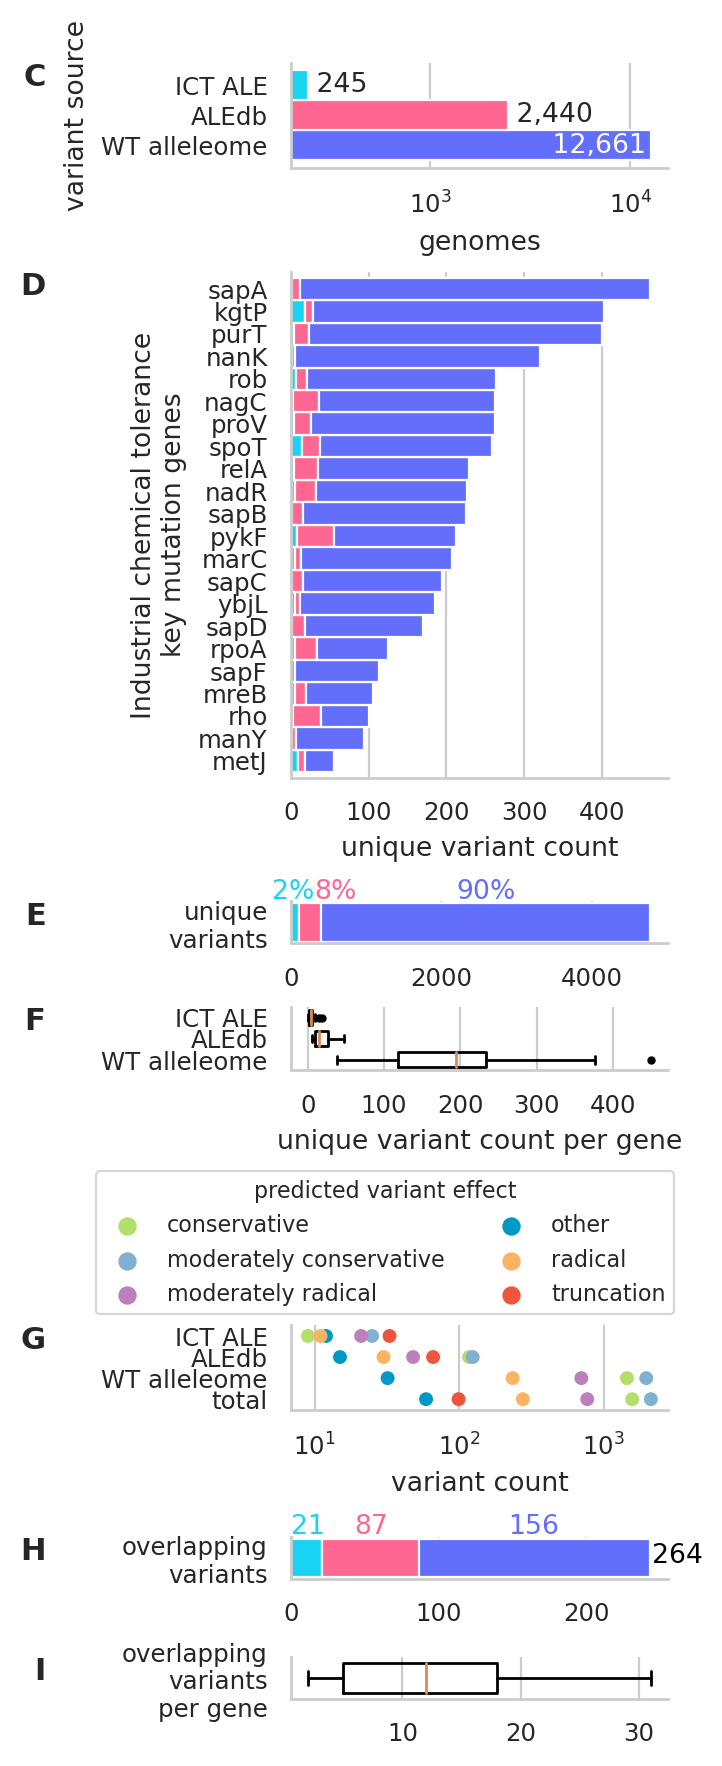

In [13]:
import seaborn as sns
import matplotlib.pyplot as mpl
mpl.rcParams["figure.dpi"] = 200
sns.set_context("paper")
sns.set_style("whitegrid")

pal = {
    'ICT ALE': '#19D3f3',
    'ALEdb': '#ff6692',
    'WT alleleome': '#636efa',
}

fig, axs = mpl.subplots(
    7, 1,
    figsize=(3.5, 8.5),
    gridspec_kw={'height_ratios': [1.25, 6, 0.5, 0.75, 1, 0.5, 0.5]},
    layout="constrained"
)

index = ['WT alleleome', 'ALEdb', 'ICT ALE']
values = [wt_strain_cnt, other_aledb_exp_smpl_cnt, ict_exp_smpl_cnt]
colors = ['#636efa', '#ff6692', '#19D3f3']

df = pd.DataFrame({
    'Values': values,
    'Colors': colors
}, index=index)


df['Values'].plot(ax=axs[0], kind='barh', width=1, color=df['Colors'], logx=True)
max_val = max(df['Values'])
for i, value in enumerate(df['Values']):
    if value == max_val:
        axs[0].text(value * 0.95, i, " {:,}".format(value), color='white', ha='right', va='center')
    else:
        axs[0].text(value, i, " {:,}".format(value), ha='left', va='center')
axs[0].yaxis.grid(False)
axs[0].set_xlabel('genomes')
axs[0].set_ylabel('variant source')

df = var_source_cnt_df.copy()
df['sum'] = df.sum(axis=1)
df.sort_values(by='sum', inplace=True)
df.drop(columns=['sum'], inplace=True)
df.plot.barh(ax=axs[1], stacked=True, width=1, color=pal)
axs[1].set_ylabel('Industrial chemical tolerance\nkey mutation genes')
axs[1].set_xlabel('unique variant count')
axs[1].legend().remove()
axs[1].yaxis.grid(False)


x = ['unique\nvariants']
i = len(var_df[var_df.source == 'ICT ALE'])
v1 = [i]
a = len(var_df[var_df.source == 'ALEdb'])
v2 = [a]
p = len(var_df[var_df.source == 'WT alleleome'])
v3 = [p]
t = i+a+p
p1 = axs[2].barh(x, v1, color=pal['ICT ALE'])
p2 = axs[2].barh(x, v2, left=v1, color=pal['ALEdb'])
p3 = axs[2].barh(x, v3, left=v2, color=pal['WT alleleome'])
# axs[2].bar_label(p2, label_type='center', fontsize=10, labels=["{:.0f}".format(100*(a/t))+'%'], color='black')
# axs[2].bar_label(p3, label_type='center', fontsize=10, labels=["{:.0f}".format(100*(p/t))+'%'], color='white')

# Manually calculate the label positions
y_pos = [rect.get_y() + rect.get_height()/2 for rect in p1]
axs[2].text(-250, y_pos[0] + 0.5, "{:.0f}".format(100*(i/t))+'%', color='#19D3f3')

y_pos = [rect.get_y() + rect.get_height()/2 for rect in p2]
axs[2].text(i+a/2, y_pos[0] + 0.5, "{:.0f}".format(100*(a/t))+'%', color='#ff6692')

y_pos = [rect.get_y() + rect.get_height()/2 for rect in p3]
axs[2].text(i+a+(p/2)-500, y_pos[0] + 0.5, "{:.0f}".format(100*(p/t))+'%', color='#636efa')

axs[2].yaxis.grid(False)


data = [list(var_source_cnt_df['WT alleleome']), list(
    var_source_cnt_df['ALEdb']), list(var_source_cnt_df['ICT ALE'])]
median_colr = '#DE8959'
axs[3].boxplot(
    data, vert=False,
    widths=(0.7, 0.7, 0.7),
    labels=['WT alleleome', 'ALEdb', 'ICT ALE'],
    flierprops=dict(marker='.', markeredgecolor='none',
                    markerfacecolor='black'),
    medianprops=dict(color=median_colr)
)
axs[3].set_ylabel('')
axs[3].set_xlabel('unique variant count per gene')
axs[3].yaxis.grid(False)


sns.stripplot(
    ax=axs[4],
    data=var_src_pred_eff_cnt_df, y="source", x="count",
    dodge=False,
    jitter=0,
    hue="predicted variant effect",
    palette=var_eff_pal,
    order=['ICT ALE', 'ALEdb', 'WT alleleome', 'total'],
)
axs[4].set_xscale('log')
axs[4].set_ylabel('')
axs[4].set_xlabel('variant count')
axs[4].legend(
    ncol=2,
    title='predicted variant effect',
    bbox_to_anchor=(0.25, 1), loc='lower center',
    fontsize=8,
    title_fontsize=8,
    markerscale=0.75
    )


x = ['overlapping\nvariants']
i = len(overlap_nonsyn_df[overlap_nonsyn_df.source == 'ICT ALE'])
v1 = [i]
a = len(overlap_nonsyn_df[overlap_nonsyn_df.source == 'ALEdb'])
v2 = [a]
p = len(overlap_nonsyn_df[overlap_nonsyn_df.source == 'WT alleleome'])
v3 = [p]
p1 = axs[5].barh(x, v1, color=pal['ICT ALE'])
p2 = axs[5].barh(x, v2, left=v1, color=pal['ALEdb'])
p3 = axs[5].barh(x, v3, left=v2, color=pal['WT alleleome'])
# axs[5].bar_label(p1, label_type='center', fontsize=10, labels=["{:.0f}".format(i)], color='white')
# axs[5].bar_label(p2, label_type='center', fontsize=10, labels=["{:.0f}".format(a)], color='white')
# axs[5].bar_label(p3, label_type='center', fontsize=10, labels=["{:.0f}".format(p)], color='white')

# Manually calculate the label positions
y_pos = [rect.get_y() + rect.get_height()/2 for rect in p1]
axs[5].text(0, y_pos[0] + 0.5, "{:.0f}".format(i), color='#19D3f3')

y_pos = [rect.get_y() + rect.get_height()/2 for rect in p2]
axs[5].text(i+a/4, y_pos[0] + 0.5, "{:.0f}".format(a), color='#ff6692')

y_pos = [rect.get_y() + rect.get_height()/2 for rect in p3]
axs[5].text(i+a+(p/4), y_pos[0] + 0.5, "{:.0f}".format(p), color='#636efa')

t = i+a+p
axs[5].text(t-20, y_pos[0]-0.1, "{:.0f}".format(t), color='black')

axs[5].yaxis.grid(False)

axs[6].boxplot(
    gene_ovrlp_var_cnt_df['overlapping variant count'], vert=False,
    labels=['overlapping\nvariants\nper gene'],
    widths=(0.7),
    flierprops=dict(marker='.', markeredgecolor='none',
                    markerfacecolor='black'),
    medianprops=dict(color=median_colr)
)
axs[6].yaxis.grid(False)

sns.despine(top=True, right=True)

labels = ['C', 'D', 'E', 'F', 'G', 'H', 'I']
for i, ax in enumerate(axs):
    ax.text(-0.65, 1, labels[i], transform=ax.transAxes, fontsize=11, va='top', ha='right', fontweight='bold')

mpl.savefig("f1cdefghi.svg")